<a href="https://colab.research.google.com/github/sahanediriweera/advancedPytorch/blob/main/Pytorch_Advanced_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt


weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = weight*X + bias

X,y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.3000],
         [0.3140],
         [0

In [2]:
train_split = int(0.8*len(X))

X_train,X_test = X[:train_split],X[train_split:]
y_train,y_test = y[:train_split],y[train_split:]


len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

In [3]:
# def plot_prediction(train_data = X_train,train_label=y_train,test_data = X_test,test_label = y_test,predictions = None):
#   plt.figure(figsize = (10,7))
#   plt.scatter(train_data,train_label,c = 'b', s = 4, label = "Training data")
#   plt.scatter(test_data,test_label, c = 'g', s = 4, label = "Testing data")
#   if predictions is not None:
#     plt.scatter(test_data,predictions, c = 'r', s = 4 ,label = "Predictions")
  
#   plt.legend(prop = {"size": 14});


def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

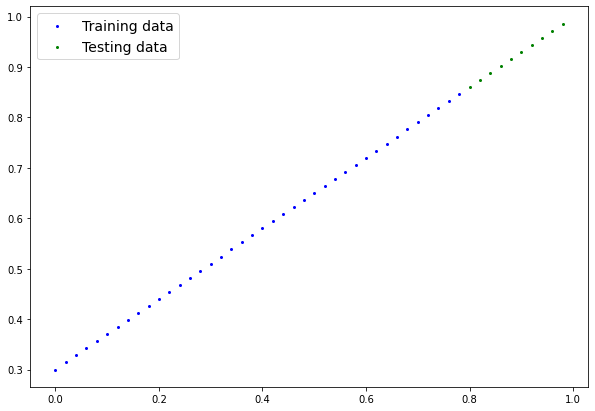

In [5]:
plot_predictions()

In [6]:
# class LinearRegressionModel(torch.nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.weights = torch.nn.Parameter(torch.randn(1,dtype = torch.float), requires_grad = True)
#     self.bias = torch.nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)

#   def forward(self, x:torch.Tensor):
#     return self.weights, self.bias


# Create a Linear Regression model class
from torch import nn 

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)


In [7]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()

list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode():
  y_pred = model_1(X_test)

In [10]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values:\n{y_pred}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


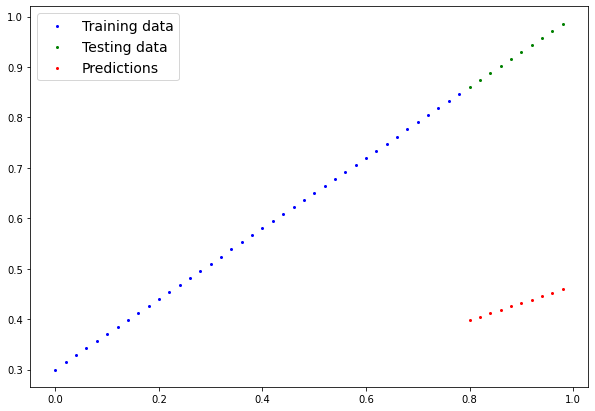

In [11]:
with torch.inference_mode():

  plot_predictions(predictions = model_1(X_test))


In [12]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.01)

In [13]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epochs_count = []

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    if epochs%10 == 0:
      epochs_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 1 | MAE Train Loss: 0.3013603389263153 | MAE Test Loss: 0.4675942063331604 
Epoch: 2 | MAE Train Loss: 0.28983935713768005 | MAE Test Loss: 0.4541231691837311 
Epoch: 3 | MAE Train Loss: 0.2783183455467224 | MAE Test Loss: 0.44065219163894653 
Epoch: 4 | MAE Train Loss: 0.26679736375808716 | MAE Test Loss: 0.4271811842918396 
Epoch: 5 | MAE Train Loss: 0.2552763521671295 | MAE Test Loss: 0.41371020674705505 
Epoch: 6 | MAE Train Loss: 0.24375534057617188 | MAE Test Loss: 0.40023916959762573 
Epoch: 7 | MAE Train Loss: 0.23223432898521423 | MAE Test Loss: 0.3867681920528412 
Epoch: 8 | MAE Train Loss: 0.22071333229541779 | MAE Test Loss: 0.37329721450805664 
Epoch: 9 | MAE Train Loss: 0.20919232070446014 | MAE Test Loss: 0.3598262071609497 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 11 | MAE Train Loss: 0.18615034222602844 | MAE Test Loss: 0.3328842

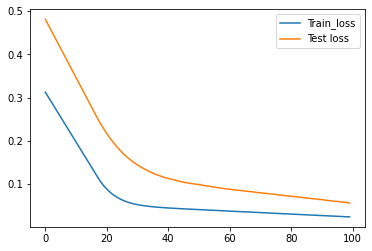

In [14]:
plt.plot(epochs_count,train_loss_values,label = "Train_loss")
plt.plot(epochs_count,test_loss_values,label = "Test loss")
plt.legend();

In [15]:
from pathlib import Path
import os

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = os.path.join(MODEL_PATH,MODEL_NAME)

In [16]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_1.pth


In [17]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0